# Tutorial 2: Source Characterization
https://astronomers.skatelescope.org/ska-science-data-challenge-1/

---

In [1]:
freqs = [1400]

In [2]:
from source.utils.bdsf_utils import  load_truth_df
from path import train_truth_path
from source.utils.columns import SRL_CAT_COLS, SRL_COLS_TO_DROP, SRL_NUM_COLS
import numpy as np
import seaborn as sns # For drawing useful graphs, such as bar graphs
import matplotlib.pyplot as plt

In [3]:
SRL_CAT_COLS = ["S_Code"]

SRL_COLS_TO_DROP = [
    "Isl_id",
    "RA",
    "E_RA",
    "DEC",
    "E_DEC",
    "RA_max",
    "E_RA_max",
    "DEC_max",
    "E_DEC_max",
    "PA",
    "E_PA",
]

SRL_NUM_COLS = [
    "Total_flux",
    "E_Total_flux",
    "Peak_flux",
    "E_Peak_flux",
    "Maj",
    "E_Maj",
    "Min",
    "E_Min",
    "Maj_img_plane",
    "E_Maj_img_plane",
    "Min_img_plane",
    "E_Min_img_plane",
    "PA_img_plane",
    "E_PA_img_plane",
    "DC_Maj",
    "E_DC_Maj",
    "DC_Min",
    "E_DC_Min",
    "DC_PA",
    "E_DC_PA",
    "DC_Maj_img_plane",
    "E_DC_Maj_img_plane",
    "DC_Min_img_plane",
    "E_DC_Min_img_plane",
    "DC_PA_img_plane",
    "E_DC_PA_img_plane",
    "Isl_Total_flux",
    "E_Isl_Total_flux",
    "Isl_rms",
    "Isl_mean",
    "Resid_Isl_rms",
    "Resid_Isl_mean",
    "n_gaussians",
]


In [4]:
print(len(SRL_COLS_TO_DROP))
print(len(SRL_NUM_COLS))

11
33


---

In [5]:
train_truth_cat_df = load_truth_df(train_truth_path(freqs[0]), skiprows=18)

In [6]:
print(train_truth_cat_df)

             id   ra_core   dec_core   ra_cent   dec_cent          flux  \
0      19583869 -0.027182 -29.880180 -0.025822 -29.881343  1.516060e-05   
1       2279500 -0.025735 -29.843031 -0.019444 -29.840956  4.334940e-08   
2       6762901 -0.102810 -29.801121 -0.102775 -29.800858  1.202550e-08   
3      34081021 -0.096500 -29.755894 -0.096451 -29.755994  1.173220e-07   
4      13118570 -0.123563 -29.939310 -0.123545 -29.939322  7.068320e-08   
...         ...       ...        ...       ...        ...           ...   
70732    444324 -0.149431 -29.789682 -0.149431 -29.789682  2.055860e-07   
70733    335349 -0.015408 -29.886108 -0.015408 -29.886108  1.471160e-08   
70734    308758 -0.122849 -29.905788 -0.122849 -29.905788  6.973240e-08   
70735    999825 -0.260741 -29.909771 -0.260741 -29.909771  3.409990e-07   
70736   1270541 -0.265334 -29.745770 -0.265334 -29.745770  5.363200e-07   

       core_frac    b_maj    b_min       pa  size  class  
0       0.009637  242.875  124.447   19.

### Introdction

This notebook will show how to train a ML algorithm to classify between objects

In [7]:
%store -r sources_training


In [8]:
sources_training[freqs[0]]

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,n_gaussians
0,0,0,359.999746,0.000014,-29.856456,0.000011,9.947102e-07,1.908813e-07,6.020551e-07,7.738053e-08,...,64.362563,25.682843,5.253248e-07,8.197129e-08,7.220221e-08,-3.125654e-08,1.380381e-08,-3.114713e-08,S,1
1,1,1,359.999413,0.000017,-29.828395,0.000009,4.765558e-06,4.187382e-07,9.121587e-07,6.799415e-08,...,104.110879,8.138976,3.112229e-06,1.788294e-07,7.380012e-08,-2.670467e-08,9.398234e-08,-4.783774e-08,S,1
2,2,2,359.999746,0.000005,-29.794905,0.000009,2.980899e-06,2.660662e-07,1.288173e-06,8.365145e-08,...,10.713707,8.554466,1.931456e-06,1.303469e-07,7.901944e-08,-2.435674e-08,1.658425e-08,-2.374887e-08,S,1
3,3,5,359.999732,0.000006,-29.740689,0.000005,1.489622e-06,1.745461e-07,1.260154e-06,8.997610e-08,...,53.702714,70.682121,1.216590e-06,1.228672e-07,8.677247e-08,-9.041280e-09,7.439110e-09,-9.216460e-09,S,1
4,4,6,359.999559,0.000023,-29.732342,0.000012,2.598173e-06,3.844502e-07,7.295256e-07,8.591499e-08,...,76.401510,12.657255,1.788939e-06,1.567520e-07,8.636927e-08,-6.577470e-09,3.864574e-08,-6.473210e-09,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,6713,6629,359.731508,0.000012,-29.876898,0.000009,1.106944e-06,1.990343e-07,7.408404e-07,8.627216e-08,...,62.546396,17.522848,8.364963e-07,1.611191e-07,8.193609e-08,-3.458156e-08,1.135522e-08,-3.466038e-08,S,1
6714,6714,6630,359.731638,0.000005,-29.758883,0.000008,5.810244e-06,3.446668e-07,2.177925e-06,9.564250e-08,...,149.059959,3.726750,4.671508e-06,2.152728e-07,9.755728e-08,-6.453270e-09,6.726988e-08,-2.335470e-09,S,1
6715,6715,6631,359.731357,0.000014,-29.893082,0.000024,1.267585e-06,2.766859e-07,5.512391e-07,8.698541e-08,...,156.735241,17.127312,6.344469e-07,1.183303e-07,8.356837e-08,-4.278501e-08,2.107820e-09,-4.278609e-08,S,1
6716,6716,6632,359.731581,0.000004,-29.791127,0.000004,2.222179e-06,1.891976e-07,1.809841e-06,9.493669e-08,...,9.110768,24.449253,2.107202e-06,1.501826e-07,9.104431e-08,-1.199970e-08,3.211200e-08,-1.223132e-08,S,1


---

In [10]:
from source.utils.classification import SKLClassification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [11]:
model = SKLClassification(
    algorithm=RandomForestClassifier,
    classifier_kwargs={"n_estimators": 100, "class_weight": "balanced"},
)

In [13]:
def pre_process(model,
    srl_df,
    truth_cat_df,
    regressand_col=None,
    freq=1400,
    srl_cat_cols=SRL_CAT_COLS,
    srl_num_cols=SRL_NUM_COLS,
    srl_drop_cols=SRL_COLS_TO_DROP,
    sl=np.s_[::2],
):
    """
    Train the regressor on <regressand_col> using a crossmatched PyBDSF
    source list.

    Args:
        srl_df (:obj:`pandas.DataFrame`): Source list.
        truth_cat_df (:obj:`pandas.DataFrame`): Truth catalogue.
        regressand_col: (`str`): Regressand column name.
        freq: (`int`): Frequency band (MHz).
        srl_cat_cols: (`list`) Categorical columns in source list.
        srl_num_cols: (`list`) Numerical columns in source list.
        srl_drop_cols: (`list`) Columns to exclude in source list.
        sl: (`slice`) Slice of source list to use for training.
    Returns:
        srl_df (`str`): Crossmatched source list DataFrame used for training.
    """
    # Set defaults.
    #
    if regressand_col is None:
        regressand_col = model.defaults["regressand_col"]

    # Get crossmatched DataFrame using the SDC1 scorer.
    #
    xmatch = model._xmatch_using_scorer(srl_df, truth_cat_df, freq)
    xmatch_df = xmatch.match_df

    # Reindex both source list and matched dataframes and add matched regressand
    # column values to source list DataFrame.
    #
    # This leaves NaN values for unmatched sources in <srl_df>.
    #
    srl_df = srl_df.set_index("Source_id")
    xmatch_df = xmatch_df.set_index("id")
    srl_df[regressand_col] = xmatch_df[regressand_col]

    # Preprocess source list, take slice, and construct training dataset.
    #
    srl_df = model._preprocess_srl_df(srl_df, srl_cat_cols, srl_num_cols, srl_drop_cols).iloc[sl, :]
    train_x = srl_df[srl_cat_cols + srl_num_cols]
    train_y = srl_df[regressand_col].values
    
    
    # classifier._fit(train_x, train_y)

    return srl_df, train_x, train_y


In [14]:
srl_df, train_x, train_y  = pre_process(model, sources_training[freqs[0]], train_truth_cat_df, regressand_col="class_t", freq=freqs[0])

2022-06-09 13:20:09,990 [MainThread  ][INFO ] SKAO Science Data Challenge Scoring Pipeline
2022-06-09 13:20:09,995 [MainThread  ][INFO ] Scoring pipeline started
2022-06-09 13:20:10,170 [MainThread  ][INFO ] Catalogue preparation complete. Elapsed time: 0.18s
2022-06-09 13:20:11,351 [MainThread  ][INFO ] [Sdc1XMatch.execute] complete in 1.18s
2022-06-09 13:20:11,352 [MainThread  ][INFO ] Crossmatch runs complete. Elapsed time: 1.36s
2022-06-09 13:20:11,413 [MainThread  ][INFO ] Sieving complete. Elapsed time: 1.42s
2022-06-09 13:20:11,524 [MainThread  ][INFO ] Scoring pipeline complete. Elapsed time: 1.53s
2022-06-09 13:20:11,528 [MainThread  ][INFO ] Final score: 4769.72


In [15]:
print(srl_df.shape)
print(train_x.shape)
print(train_y.shape)

(3341, 35)
(3341, 34)
(3341,)


In [16]:
print(train_x.describe())

            S_Code    Total_flux  E_Total_flux     Peak_flux   E_Peak_flux  \
count  3341.000000  3.341000e+03  3.341000e+03  3.341000e+03  3.341000e+03   
mean      1.871595  6.063053e-06  2.433020e-07  2.508398e-06  8.502831e-08   
std       0.455148  2.594086e-05  1.211514e-07  8.697691e-06  1.341033e-08   
min       0.000000  3.725560e-07  9.603121e-08  3.902001e-07  5.132349e-08   
25%       2.000000  1.239806e-06  1.758960e-07  8.047739e-07  7.777614e-08   
50%       2.000000  2.113134e-06  2.081420e-07  1.257724e-06  8.345158e-08   
75%       2.000000  4.409415e-06  2.685722e-07  2.285796e-06  9.044798e-08   
max       2.000000  1.154442e-03  1.915578e-06  3.601996e-04  4.276061e-07   

               Maj         E_Maj          Min         E_Min  Maj_img_plane  \
count  3341.000000  3.341000e+03  3341.000000  3.341000e+03    3341.000000   
mean      0.000276  2.098006e-05     0.000192  1.278724e-05       0.000276   
std       0.000109  1.428989e-05     0.000032  8.282662e-06    

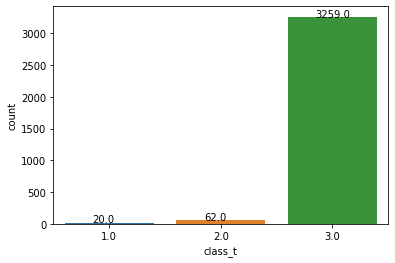

In [17]:
ax = sns.countplot(x="class_t",data=srl_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [21]:
feature_names = train_x.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(train_x, train_y)

RandomForestClassifier(random_state=0)

In [68]:
from sklearn.metrics import f1_score
y_pred = forest.predict(train_x)

f1_score(train_y, y_pred, average='macro')

1.0

So it does get a perfect socore on the training set.

In [27]:
importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

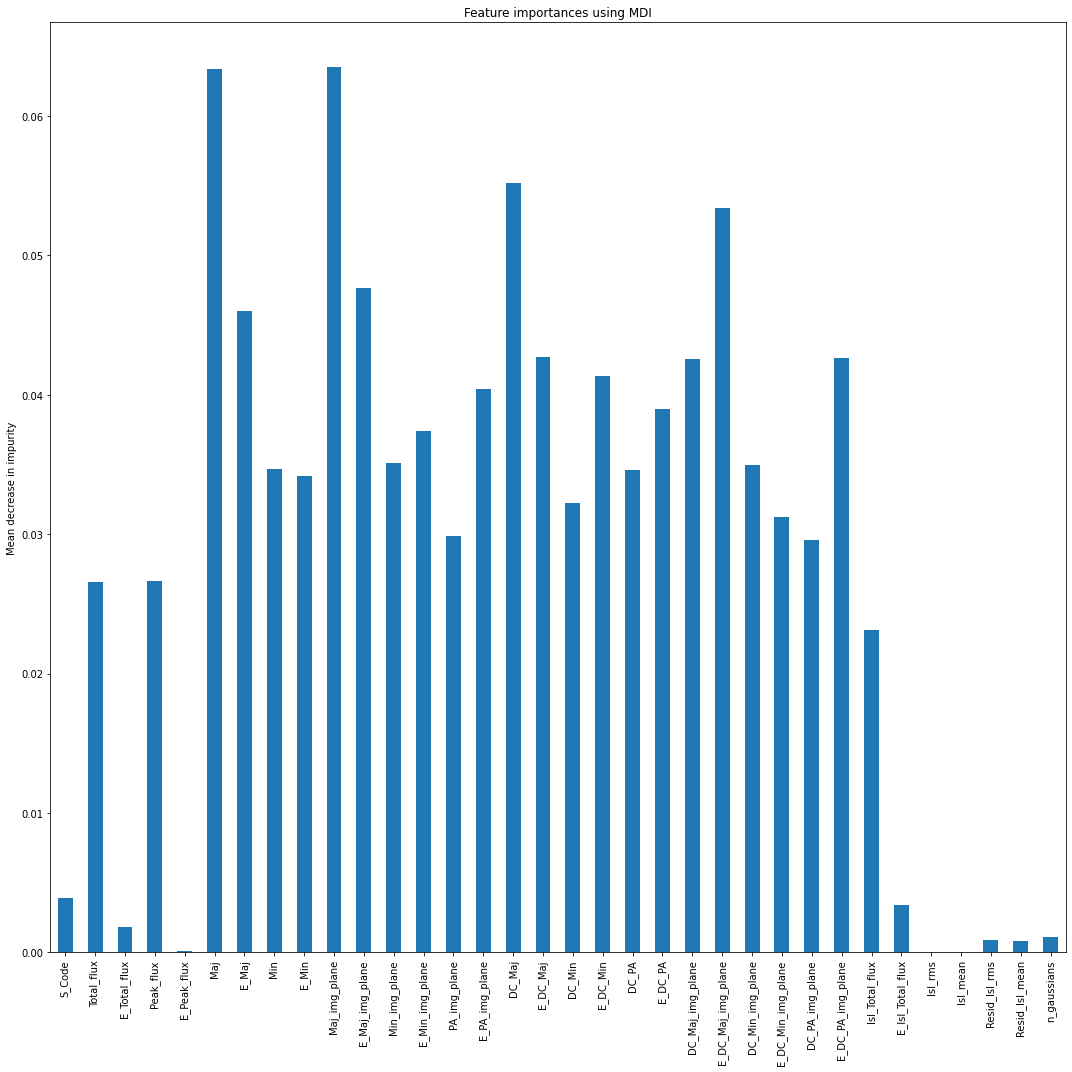

In [30]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,15))
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [50]:
print(len(train_y))

3341


In [56]:
dfff = train_x [[ 'E_DC_Maj_img_plane', "DC_Maj_img_plane", 'E_DC_Maj', 'DC_Maj', 'E_PA_img_plane', "E_Maj_img_plane", "Maj_img_plane","E_Maj", "Maj"] ]



In [57]:
dfff

,E_DC_Maj_img_plane,DC_Maj_img_plane,E_DC_Maj,DC_Maj,E_PA_img_plane,E_Maj_img_plane,Maj_img_plane,E_Maj,Maj
Source_id,,,,,,,,,
0,0.000034,0.000174,0.000034,0.000174,25.682843,0.000034,0.000241,0.000034,0.000241
2,0.000023,0.000260,0.000023,0.000260,8.554466,0.000023,0.000309,0.000023,0.000309
4,0.000055,0.000379,0.000055,0.000379,12.657255,0.000055,0.000414,0.000055,0.000414
6,0.000002,0.000130,0.000002,0.000130,1.271685,0.000002,0.000212,0.000002,0.000212
8,0.000037,0.000187,0.000037,0.000187,16.877738,0.000037,0.000250,0.000037,0.000250
...,...,...,...,...,...,...,...,...,...
6708,0.000073,0.000449,0.000073,0.000449,15.981069,0.000073,0.000479,0.000073,0.000479
6710,0.000015,0.000123,0.000015,0.000123,14.035441,0.000015,0.000207,0.000015,0.000207
6712,0.000006,0.000115,0.000006,0.000115,14.448209,0.000006,0.000203,0.000006,0.000203


In [58]:
dfff['class'] = np.array(train_y)

/tmp/ipykernel_2523076/2582243533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['class'] = np.array(train_y)


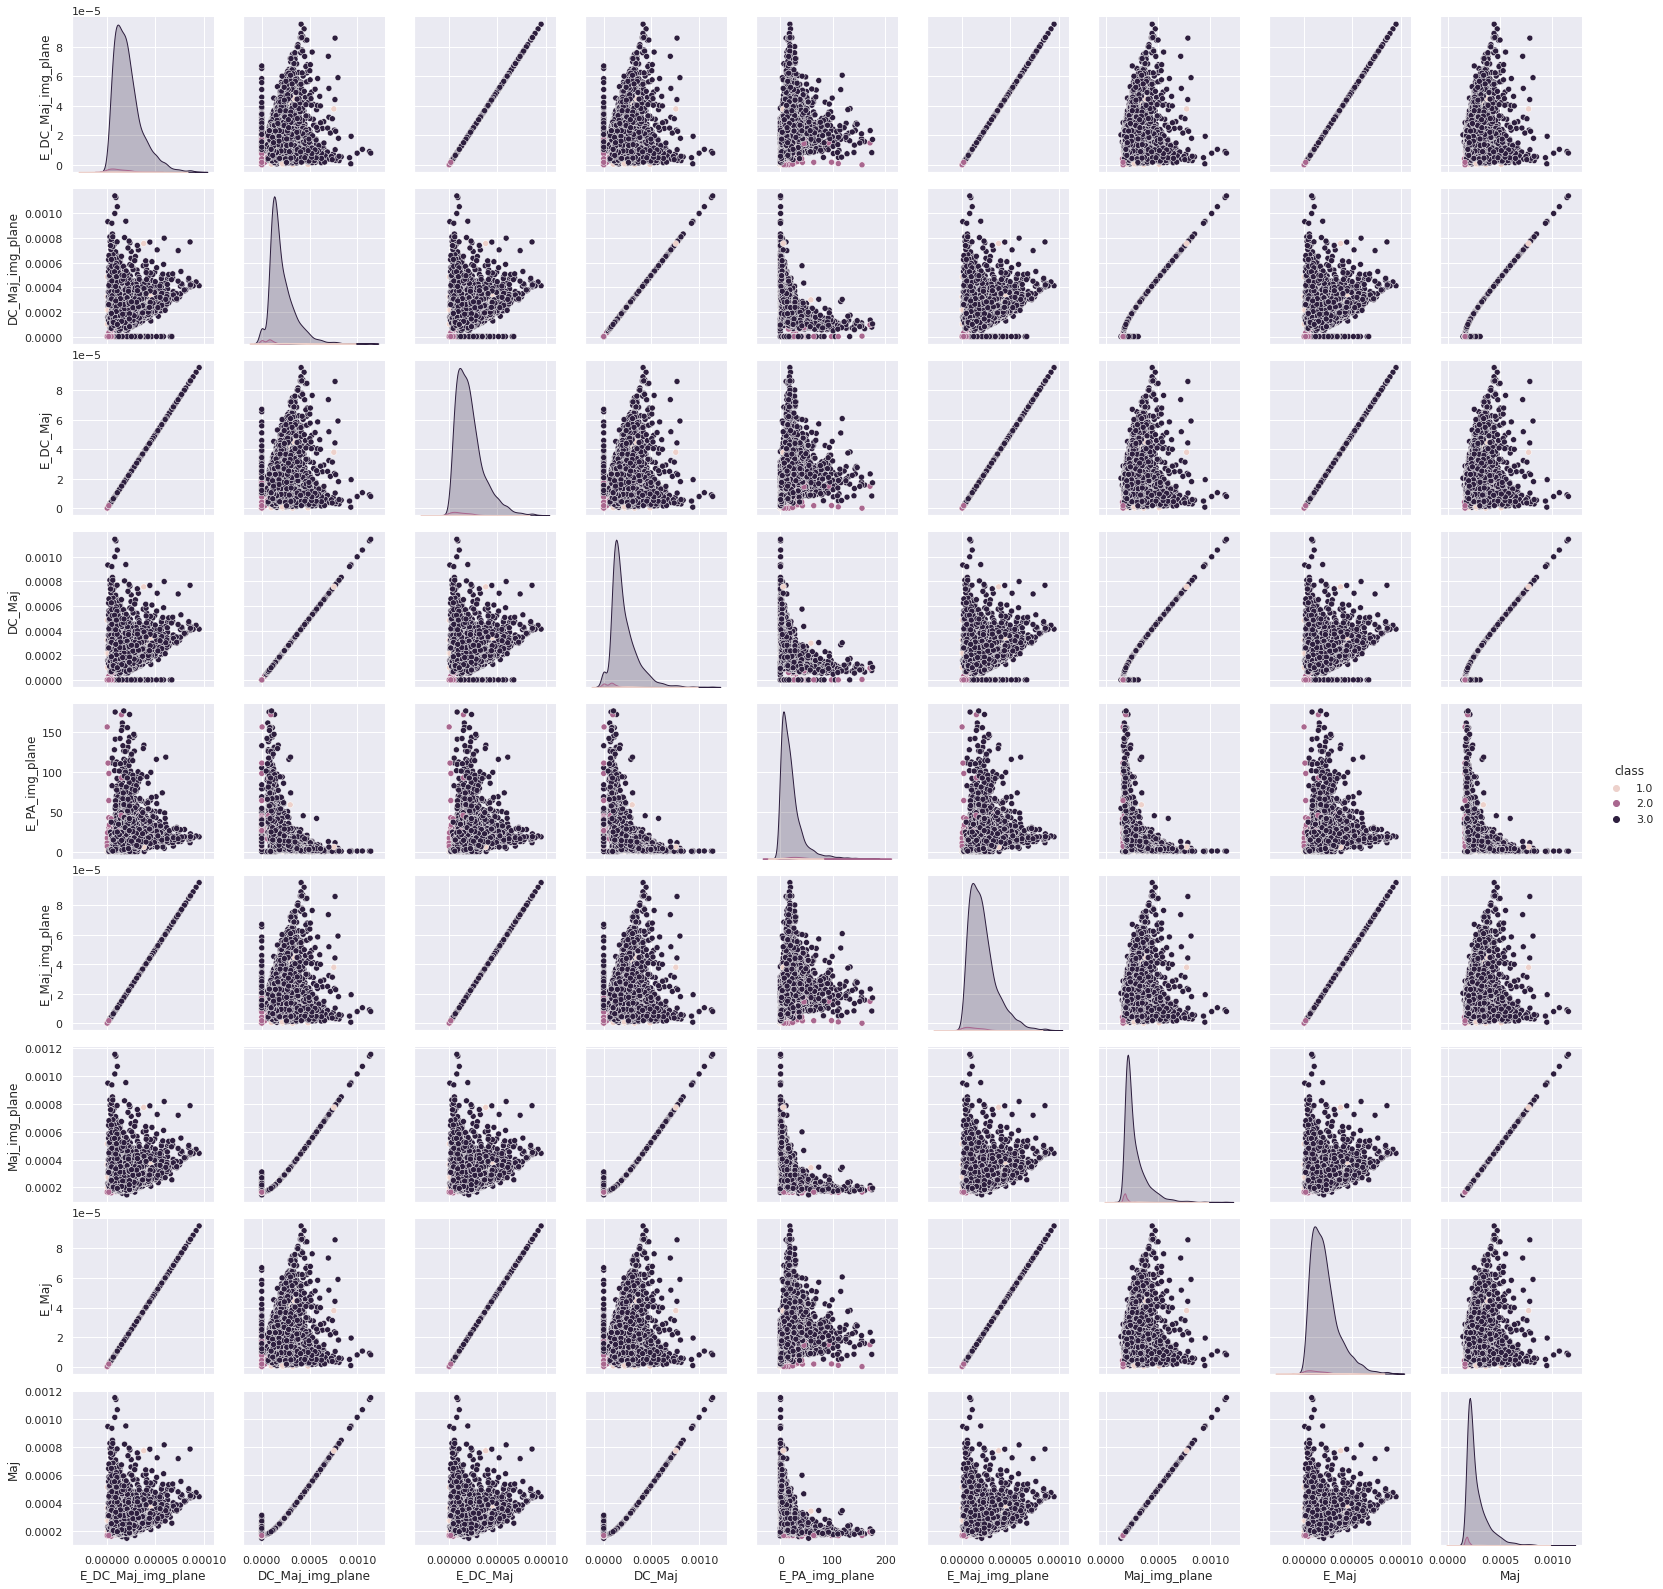

In [59]:
sns.set(font_scale=1)
sns.pairplot(dfff, hue="class")

---

In [76]:
%store -r sources_full


In [79]:
source_df = sources_full[1400]
source_df.head()

,Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,...,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,n_gaussians
0,0,0,0.066975,0.000004,-29.932994,0.000005,0.000002,1.572058e-07,0.000001,7.493803e-08,...,34.020441,14.655325,0.000001,9.347710e-08,7.130576e-08,-3.632804e-08,1.249534e-08,-3.580807e-08,S,1
1,1,1,0.066921,0.000002,-29.922052,0.000001,0.000011,2.019120e-07,0.000006,7.136677e-08,...,131.050074,1.210857,0.000009,1.401998e-07,6.879522e-08,-3.488933e-08,6.091204e-08,-2.236411e-08,S,1
2,2,3,0.065637,0.000001,-29.829974,0.000001,0.000101,7.654782e-07,0.000017,9.476611e-08,...,134.774211,0.340845,0.000239,1.145924e-06,9.476611e-08,-2.333695e-08,9.284529e-07,8.610156e-07,M,2
3,3,3,0.064335,0.000008,-29.829784,0.000006,0.000014,5.335616e-07,0.000003,8.411465e-08,...,123.368101,2.899619,0.000239,1.145924e-06,9.476611e-08,-2.333695e-08,9.284529e-07,8.610156e-07,C,1
4,4,3,0.064787,0.000004,-29.829553,0.000003,0.000003,2.160466e-07,0.000002,1.004591e-07,...,100.434802,17.254079,0.000239,1.145924e-06,9.476611e-08,-2.333695e-08,9.284529e-07,8.610156e-07,C,1


In [96]:
def get_testX(clasf,
    model,
    srl_df,
    srl_cat_cols=SRL_CAT_COLS,
    srl_num_cols=SRL_NUM_COLS,
    srl_drop_cols=SRL_COLS_TO_DROP,
    sl=np.s_[::],
):
    """
    Predict the <regressand_column> for the test set source list using the
    regressor.

    Args:
        srl_df (:obj:`pandas.DataFrame`): Source list.
        srl_cat_cols: (`list`) Categorical columns in source list.
        srl_num_cols: (`list`) Numerical columns in source list.
        srl_drop_cols: (`list`) Columns to exclude in source list.
        sl: (`slice`) Slice of source list to use for testing.
    Returns:
        (:obj:`numpy.ndarray`): Predicted values.
    """
    # Preprocess source list, take slice, and construct test dataset.
    #
    srl_df = model._preprocess_srl_df(
        srl_df, srl_cat_cols, srl_num_cols, srl_drop_cols
    ).iloc[sl, :]
    test_x = srl_df[srl_cat_cols + srl_num_cols]
    test_y = clasf.predict(test_x)# why is it called test_y

    return test_x, test_y 

In [97]:
def predict_proba(
    model,
    srl_df,
    srl_cat_cols=SRL_CAT_COLS,
    srl_num_cols=SRL_NUM_COLS,
    srl_drop_cols=SRL_COLS_TO_DROP,
    sl=np.s_[::],
):
    """
    Analogous to the SKLModel.test method; predict the classification probability
    for the test set source list.

    Args:
        srl_df (:obj:`pandas.DataFrame`): Source list.
        srl_cat_cols: (`list`) Categorical columns in source list.
        srl_num_cols: (`list`) Numerical columns in source list.
        srl_drop_cols: (`list`) Columns to exclude in source list.
        sl: (`slice`) Slice of source list to use for testing.
    Returns:
        (:obj:`numpy.ndarray`): Predicted values.
    """
    # Preprocess source list, take slice, and construct test dataset.
    #
    srl_df = model._preprocess_srl_df(
        srl_df, srl_cat_cols, srl_num_cols, srl_drop_cols
    ).iloc[sl, :]
    test_x = srl_df[srl_cat_cols + srl_num_cols]
    proba_y = model.predict_proba(test_x)

    return proba_y

In [98]:
testX, pred_y  = get_testX(forest, model,sources_full[freqs[0]])